# Module: Introduction

In [24]:
# Required Python module
import pandas as pd

In [27]:
# Importing the data with pandas and using its 'year' column for the index
# Make sure that LYNXdata.csv is at the same location as this python notebook
mylynx_df = pd.read_csv("LYNXdata.csv", header = 0,
                     names = ['year', 'trappings'],
                     index_col = 0)

In [28]:
# Read in the 'nottem' dataset
# Make sure that nottem.csv is at the same location as this python notebook
nottem_df = pd.read_csv("nottem.csv", header = 0,
                        names = ['index', 'temp'],
                        index_col = 0)

In [29]:
mylynx_df.head()

,trappings
year,
1821,269
1822,321
1823,585
1824,871
1825,1475


In [30]:
nottem_df.head()

,temp
index,
1,40.6
2,40.8
3,44.4
4,46.7
5,54.1


In [ ]:
#pd.series(data, index = pd.data_range())

In [31]:
# Converting the DataFrame into a Series object
# New index generation with a proper date index and frequency
mylynxts = pd.Series(mylynx_df['trappings'].values,
                     index = pd.date_range('31/12/1821' ,
                                           periods = 114,
                                           freq = 'A-DEC'))

In [32]:
# Converting the DataFrame into a Series object
# Proper time stamp with monthly frequency
nottemts = pd.Series(nottem_df['temp'].values,
                     index = pd.date_range('1920-01-31',
                                           periods = 240,
                                           freq = 'M'))

In [33]:
mylynxts.head()

1821-12-31     269
1822-12-31     321
1823-12-31     585
1824-12-31     871
1825-12-31    1475
Freq: A-DEC, dtype: int64

In [9]:
nottemts.head()

1920-01-31    40.6
1920-02-29    40.8
1920-03-31    44.4
1920-04-30    46.7
1920-05-31    54.1
Freq: M, dtype: float64

# Module: The Statistics of Time Series

In [46]:
# Required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [35]:
# Importing the data with pandas and using its 'year' column for the index
# Make sure that LYNXdata.csv is in the same folder as this python notebook
mylynx_df = pd.read_csv("LYNXdata.csv", header = 0,
                     names = ['year', 'trappings'],
                     index_col = 0)

In [36]:
# Converting the DataFrame into a Series object
# New index generation with a proper date index and frequency
mylynxts = pd.Series(mylynx_df['trappings'].values,
                     index = pd.date_range('31/12/1821' ,
                                           periods = 114,
                                           freq = 'A-DEC'))

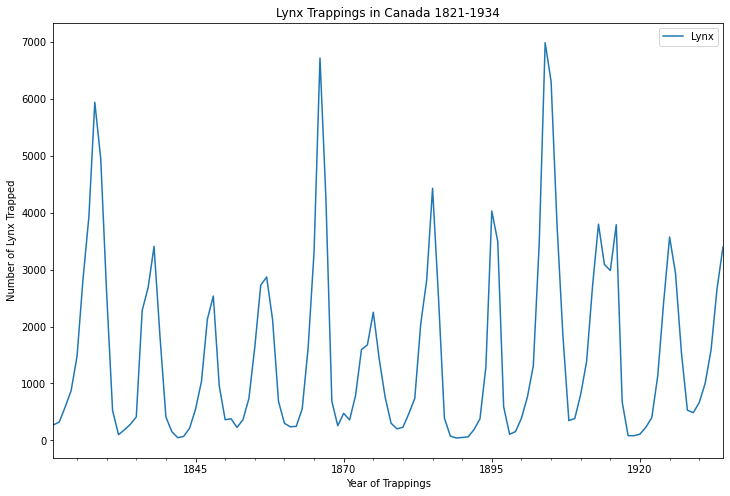

In [37]:
# Visualizing time series in Python
# 1. Line graph with matplotlib pyplot module
plt.figure(figsize=(12,8))
mylynxts.plot()
plt.title('Lynx Trappings in Canada 1821-1934')
plt.xlabel('Year of Trappings')
plt.ylabel('Number of Lynx Trapped')
plt.legend(['Lynx'])

In [38]:
# 2. Shared axis plot
# Getting the cumulative total of mylynxts
# The new object inherits the original index
cumsum_lynx = np.cumsum(mylynxts)

In [15]:
cumsum_lynx.head()

1821-12-31     269
1822-12-31     590
1823-12-31    1175
1824-12-31    2046
1825-12-31    3521
Freq: A-DEC, dtype: int64

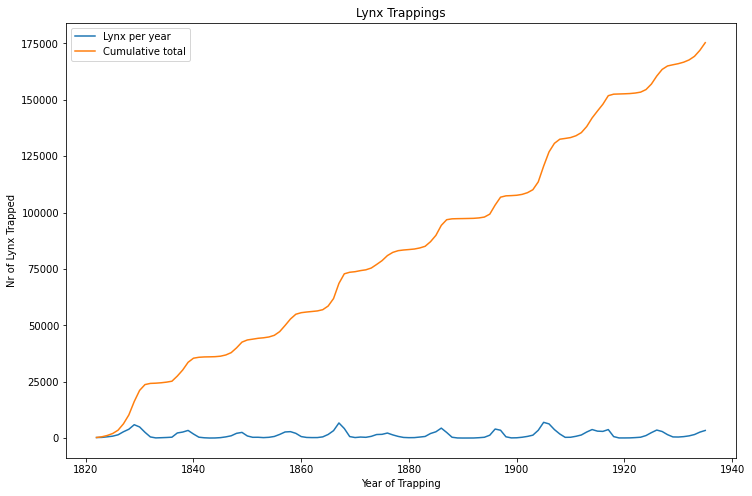

In [39]:
# Plotting two series on the same axes
plt.figure(figsize=(12,8))
plt.plot(mylynxts)
plt.plot(cumsum_lynx)
plt.title('Lynx Trappings')
plt.xlabel('Year of Trapping')
plt.ylabel('Nr of Lynx Trapped')
plt.legend(['Lynx per year', 'Cumulative total'])

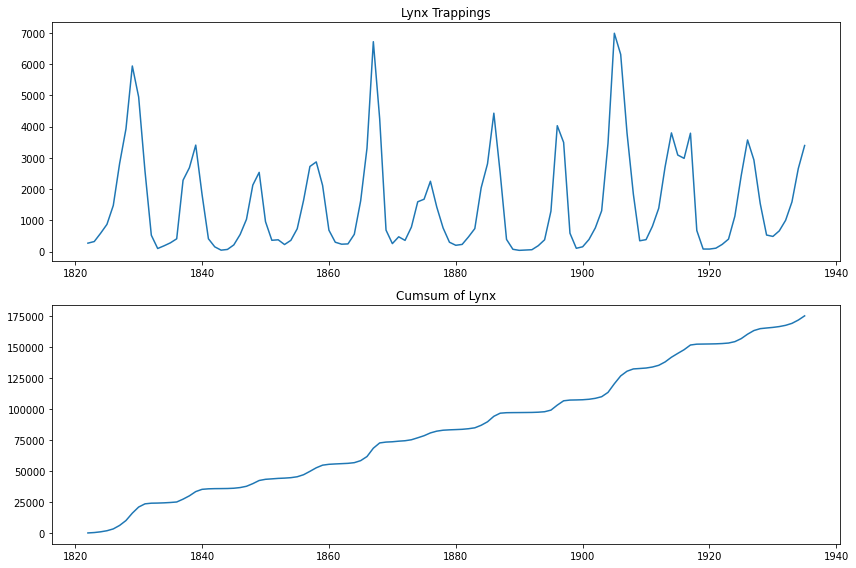

In [40]:
# 3. Two plots in the same figure with subplots
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(mylynxts)
plt.title('Lynx Trappings')

plt.subplot(2,1,2)
plt.plot(cumsum_lynx)
plt.title('Cumsum of Lynx')
plt.tight_layout()

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

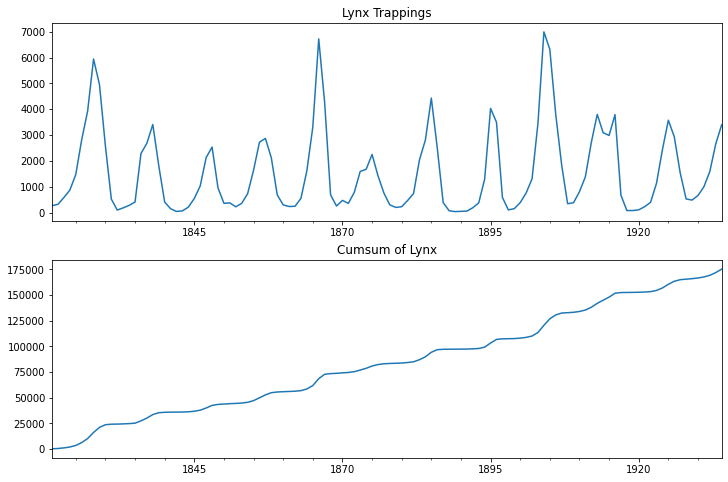

In [41]:
# Alternative method with classes
# Integrating plotting tools in the matplotlib environment
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (12,8))
mylynxts.plot(ax = ax1)
cumsum_lynx.plot(ax = ax2)
ax1.set_title("Lynx Trappings")
ax2.set_title("Cumsum of Lynx")
plt.tight_layout

In [42]:
# Test for stationarity
def stationarity_test(timeseries):
    """"Augmented Dickey-Fuller test
    A test for stationarity"""
    from statsmodels.tsa.stattools import adfuller
    print("Results of Dickey-Fuller Test:")
    df_test = adfuller(timeseries, autolag = "AIC")
    df_output = pd.Series(df_test[0:4],
                          index = ["Test statistic", "p-value",
                                   "Number of lags used",
                                   "Number of observations used"])
    print(df_output)

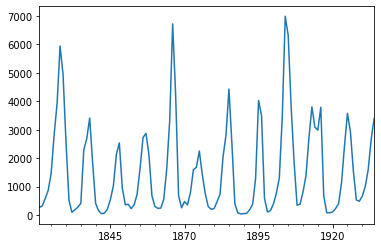

In [43]:
mylynxts.plot()

In [47]:
# Applying the test on three different datasets
# 1. The lynx dataset
stationarity_test(mylynxts)

Results of Dickey-Fuller Test:
Test statistic                  -2.996304
p-value                          0.035241
Number of lags used              7.000000
Number of observations used    106.000000
dtype: float64


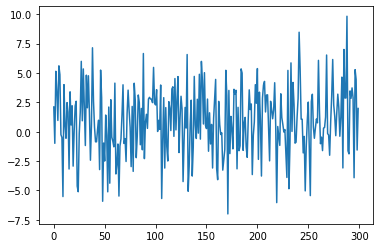

In [48]:
# 2. Random normally distributed numbers
# Note the characteristics of stationary data on the plot
plt.plot(np.random.normal(1, 3, 300))

In [49]:
stationarity_test(np.random.normal(1, 3, 300))

Results of Dickey-Fuller Test:
Test statistic                -1.304849e+01
p-value                        2.166574e-24
Number of lags used            1.000000e+00
Number of observations used    2.980000e+02
dtype: float64


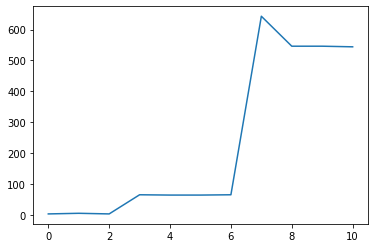

In [50]:
# 3. A vector of numbers
# Note the three levels in the data
mydata = (3, 5, 3, 65, 64, 64, 65, 643, 546, 546, 544)
plt.plot(mydata)

In [51]:
stationarity_test(mydata)

Results of Dickey-Fuller Test:
Test statistic                 42.200457
p-value                         1.000000
Number of lags used             3.000000
Number of observations used     7.000000
dtype: float64


In [52]:
# Importing ACF and PACF plot functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

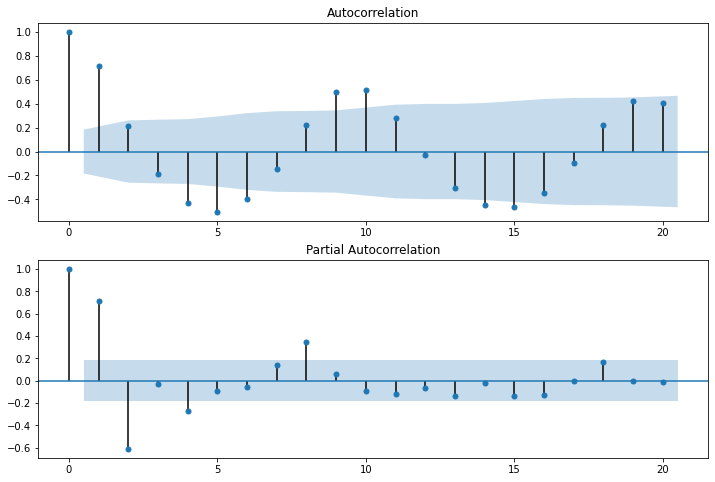

In [53]:
# Autocorrelation and partial autocorrelation in the Lynx dataset
# Two plots on one sheet
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (12,8))
plot_acf(mylynxts, lags= 20, ax = ax1)
plot_pacf(mylynxts, lags = 20, ax = ax2);

In [55]:
# Simple moving average (rolling mean)
# Note: the rolling methods are applicable only on pandas Series
#                                            and DataFrame objects
def plot_rolling(timeseries, window):
    rol_mean = timeseries.rolling(window).mean()
    rol_std = timeseries.rolling(window).std()
    
    fig = plt.figure(figsize = (12, 8))
    og = plt.plot(timeseries, color = "blue", label = "Original")
    mean = plt.plot(rol_mean, color = "red", label = "Rolling Mean")
    std = plt.plot(rol_std, color = "black", label = "Rolling Std")
    plt.legend(loc = "best")
    plt.title("Rolling Mean and Standard Deviation (window = "+str(window)+")")
    plt.show()

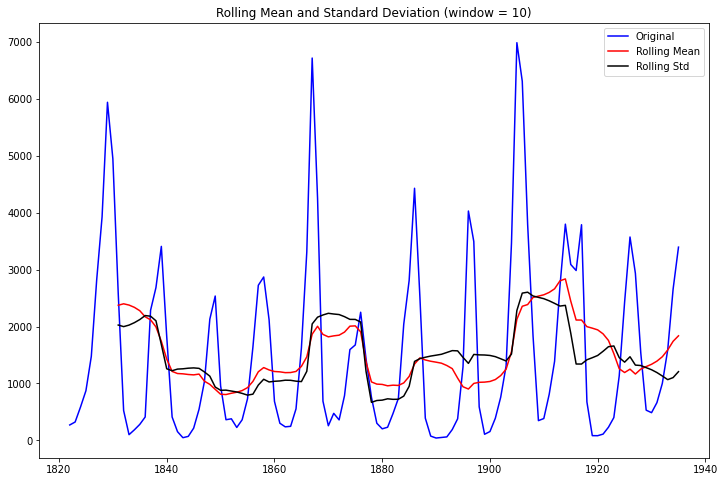

In [56]:
plot_rolling(mylynxts, 10)

In [ ]:
plot_rolling(mylynxts, 30)

In [57]:
# Components are accessible via the dot notation
# Getting the smooth values only
mylynxts.rolling(10).mean()

1821-12-31       NaN
1822-12-31       NaN
1823-12-31       NaN
1824-12-31       NaN
1825-12-31       NaN
               ...  
1930-12-31    1391.4
1931-12-31    1468.5
1932-12-31    1587.6
1933-12-31    1740.1
1934-12-31    1836.5
Freq: A-DEC, Length: 114, dtype: float64

In [58]:
# Simple rolling calculation with minimum number of periods for the window
def plot_rolling_min(timeseries, window):
    rol_mean = timeseries.rolling(window, min_periods = 1).mean()
    rol_std = timeseries.rolling(window, min_periods = 1).std()
    
    fig = plt.figure(figsize = (12, 8))
    og = plt.plot(timeseries, color = "blue", label = "Original")
    mean = plt.plot(rol_mean, color = "red", label = "Rolling Mean")
    std = plt.plot(rol_std, color = "black", label = "Rolling Std")
    plt.legend(loc = "best")
    plt.title("Rolling Mean and Standard Deviation (window = "+str(window)+")")
    plt.show()

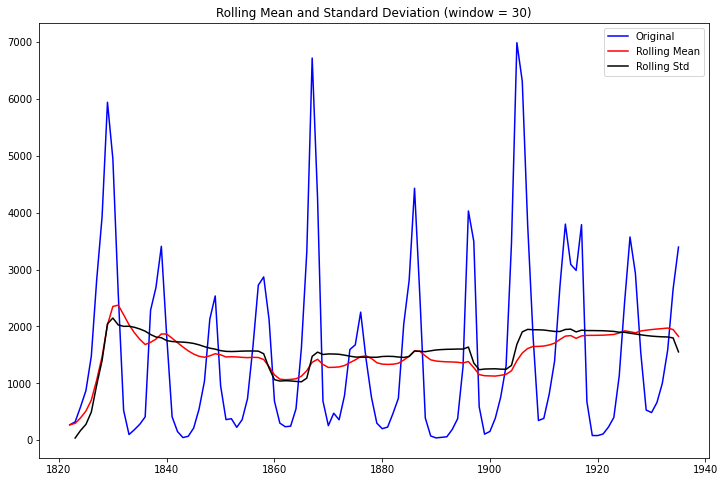

In [59]:
# No NaN values, but shorter window size if <30
plot_rolling_min(mylynxts, 30)

In [60]:
# Exponentially weighted moving average
# Note: the ewm method is applicable on pandas Series and DataFrame objects only
def plot_ewma(timeseries, alpha):
    expw_ma = timeseries.ewm(alpha=alpha).mean()

    fig = plt.figure(figsize = (12, 8))
    og_line = plt.plot(timeseries, color = "blue", label = "Original")
    exwm_line = plt.plot(expw_ma, color = "red", label = "EWMA")
    plt.legend(loc = "best")
    plt.title("EWMA (alpha= "+str(alpha)+")")
    plt.show()

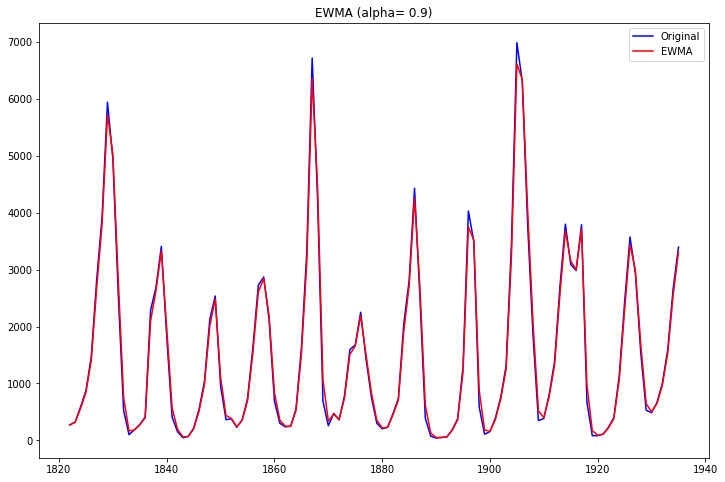

In [61]:
plot_ewma(mylynxts, 0.9)

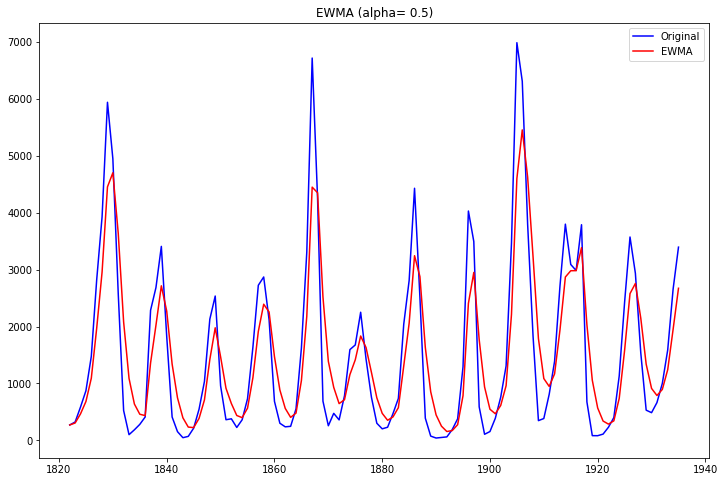

In [62]:
plot_ewma(mylynxts, 0.5)

# Module: Creating a Time Series Forecast Using ARIMA Regressions

In [ ]:
# Required packages
import pandas as pd
import numpy as np
import statsmodels as sm
import matplotlib.pyplot as plt

In [ ]:
# Importing the Lynx dataset
# Make sure that LYNXdata.csv is in the same folder as this python notebook
mylynx_df = pd.read_csv("LYNXdata.csv", header = 0,
                        index_col = 0)

In [ ]:
mylynx_df.head()

In [ ]:
# Converting the DataFrame into a Series object
# ARIMA modeling requires a tuple index
mylynxts = pd.Series(mylynx_df['trappings'].values,
                 index = pd.DatetimeIndex(data = (tuple(pd.date_range('31/12/1821',
                                                                    periods = 114,
                                                                    freq = 'A-DEC'))),
                                            freq = 'A-DEC'))

In [ ]:
mylynxts.head()

In [ ]:
# Getting the ARIMA modeling function
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
help(ARIMA)

In [ ]:
# ACF and PACF functions to test for autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# Custom stationarity test function
def stationarity_test(timeseries):
    """"Augmented Dickey-Fuller Test
    Test for Stationarity"""
    import pandas as pd
    from statsmodels.tsa.stattools import adfuller
    print("Results of Dickey-Fuller Test:")
    df_test = adfuller(timeseries, autolag = "AIC")
    df_output = pd.Series(df_test[0:4],
                          index = ["Test Statistic", "p-value", "Number of Lags Used",
                                   "Number of Observations Used"])
    print(df_output)

In [ ]:
stationarity_test(mylynxts)

In [ ]:
# ACF and PACF plots
# Rule of thumb: Start with the plot that shows the least number of significant lags
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(mylynxts, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(mylynxts, lags=20, ax=ax2)

In [ ]:
# ARIMA model setup
model = ARIMA(mylynxts, order=(2, 0, 0))  
results_AR2 = model.fit()
plt.figure(figsize=(12,8))
plt.plot(mylynxts)
plt.plot(results_AR2.fittedvalues, color='red')

In [ ]:
# Model residuals
mylynxts.tail()

In [ ]:
results_AR2.fittedvalues.tail()

In [ ]:
results_AR2.resid.tail()

In [ ]:
# The last residual (601.867) = the last original observation (3396) - the last fitted value (2794.133)
3396-2794.133

In [ ]:
# Original series - fitted values = model residuals
(mylynxts - results_AR2.fittedvalues).tail()

In [ ]:
# Residuals are close to a zero mean
np.mean(results_AR2.resid)

In [ ]:
# ACF plot to test for autocorrelation in the residuals
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(results_AR2.resid, lags=20, ax=ax1)

In [63]:
# Custom function to test for a normal distribution
def resid_histogram(data):
    import matplotlib.pyplot as plt
    from numpy import linspace
    from scipy.stats import norm

    plt.figure(figsize=(10,6))
    plt.hist(data, bins = 'auto', density = True, rwidth = 0.85,
             label = 'Residuals')
    mean_resid, std_resid = norm.fit(data)
    xmin, xmax = plt.xlim()
    curve_length = linspace(xmin, xmax, 100)
    bell_curve = norm.pdf(curve_length, mean_resid, std_resid)
    plt.plot(curve_length, bell_curve, 'm', linewidth = 2)
    plt.grid(axis='y', alpha = 0.2)
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.title('Residuals vs Normal Distribution - Mean = '+str(round(mean_resid,2))+', Std = '+str(round(std_resid,2)))
    plt.show()

In [ ]:
resid_histogram(results_AR2.resid)

In [ ]:
# Model diagnostics and improvement
results_AR2.summary()

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(results_AR2.resid, lags=20, ax=ax1)

In [ ]:
resid_histogram(results_AR2.resid)

In [ ]:
# Adjusting the model
model = ARIMA(mylynxts, order=(4, 0, 0))  
results_AR4 = model.fit()
plt.figure(figsize=(12,8))
plt.plot(mylynxts)
plt.plot(results_AR4.fittedvalues, color='red')

In [ ]:
results_AR4.summary()

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(results_AR4.resid, lags=20, ax=ax1)

In [ ]:
resid_histogram(results_AR4.resid)

In [ ]:
# ARIMA forecast
Fcast400 = results_AR4.predict(start = '31/12/1935',
                               end = '31/12/1945')

In [ ]:
# Arima(2,0,2) model and forecast
model202 = ARIMA(mylynxts, order=(2, 0, 2))  
results_M202 = model202.fit()
Fcast202 = results_M202.predict(start = '31/12/1935',
                                end = '31/12/1945')

In [ ]:
# Forecast comparison
plt.figure(figsize = (12, 8))
plt.plot(mylynxts, linewidth = 2, label = "original")
plt.plot(Fcast400, color='red', linewidth = 2,
         label = "ARIMA 4 0 0")
plt.plot(Fcast202, color='blue', linewidth = 2,
         label = "ARIMA 2 0 2")
plt.legend()

# Module: Handling Seasonal Datasets and Working with Seasonality

In [ ]:
# Required packages
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the 'nottem' dataset
# Make sure that nottem.csv is in the same folder as this python notebook
nottem = pd.read_csv("nottem.csv", header = 0, names = ['index', 'temp'],
                     index_col = 0)
nottem.head()

In [ ]:
# Pandas DataFrame object with time stamp (monthly frequency)
nottem_df = pd.DataFrame((nottem.temp).values, columns = ['temperature'],
                     index = pd.date_range('1920-01-31',
                                           periods = 240,
                                           freq = 'M'))

In [ ]:
# Pandas Series object with time stamp (monthly frequency)
nottemts = pd.Series((nottem.temp).values,
                     index = pd.date_range('1920-01-31',
                                           periods = 240,
                                           freq = 'M'))

In [ ]:
nottem_df.head()

In [ ]:
nottemts.head()

In [ ]:
# Month plot
from statsmodels.graphics.tsaplots import month_plot

In [ ]:
# Month_plot() requires the data to have a monthly (12 or 'M') frequency
# Alternative: quarter_plot() for dataset with a frequency of 4 or 'Q'
fig, ax1 = plt.subplots(1, 1, figsize = (12,8))
month_plot(nottemts, ax = ax1)
plt.title("Month Plot of Nottem")
plt.grid(axis = 'both')
plt.tight_layout()

In [ ]:
# Season plot
# Restructuring of nottem_df by pandas pivot_table
pivot_df = pd.pivot_table(nottem_df, index = nottem_df.index.month,
                          columns = nottem_df.index.year,
                          values = 'temperature')
pivot_df

In [ ]:
# Add a new index to the pivot table
month_names = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
pivot_df.index = month_names
pivot_df

In [ ]:
# Creating the season plot
plt.figure(figsize=(12,8))
plt.plot(pivot_df)
plt.grid(axis = 'both')
plt.legend(pivot_df.columns)
plt.tight_layout()

In [ ]:
# Seasonal ARIMA model with pmdarima
# Install pmdarima via PIP
import pmdarima as pm

In [ ]:
help(pm.auto_arima)

In [ ]:
mySA = pm.auto_arima(nottemts, error_action="ignore", suppress_warnings = True,
                     seasonal = True, m = 12, start_q = 1, start_p = 1, 
                     start_Q = 0, start_P = 0, max_order = 5, max_d = 1,
                     max_D = 1, D = 1, stepwise = False, trace = True)

In [ ]:
mySA.summary()

In [ ]:
# Additive or multiplicative decomposition
plt.figure(figsize=(12,6))
plt.plot(nottemts)

In [ ]:
# Seasonal Decomposition
# Simple seasonal decomposition with statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# By default model = "additive"
# For a multiplicative model use model = "multiplicative"
nottem_decomposed = seasonal_decompose(nottemts)

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (14,9))
nottemts.plot(ax = ax1)
nottem_decomposed.trend.plot(ax = ax2)
nottem_decomposed.seasonal.plot(ax = ax3)
nottem_decomposed.resid.plot(ax = ax4)
ax1.set_title("Nottem")
ax2.set_title("Trend")
ax3.set_title("Seasonality")
ax4.set_title("Residuals")
plt.tight_layout()

In [ ]:
# Decomposition based on stl - Package: stldecompose
# Install the library via PIP
from stldecompose import decompose

In [ ]:
nottem_stl = decompose(nottemts, period=12)

In [ ]:
# No NaN
nottem_stl.trend.head()

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (14,9))
nottemts.plot(ax = ax1)
nottem_stl.trend.plot(ax = ax2)
nottem_stl.seasonal.plot(ax = ax3)
nottem_stl.resid.plot(ax = ax4)
ax1.set_title("Nottem")
ax2.set_title("Trend")
ax3.set_title("Seasonality")
ax4.set_title("Residuals")
plt.tight_layout()

In [ ]:
# Eliminating the seasonal component
nottem_adjusted = nottemts - nottem_stl.seasonal
plt.figure(figsize=(12,8))
nottem_adjusted.plot()

In [ ]:
# Getting the seasonal component only
# Seasonality gives structure to the data
plt.figure(figsize=(12,8))
nottem_stl.seasonal.plot()

In [ ]:
# Creating a forecast based on STL
from stldecompose import forecast
from stldecompose.forecast_funcs import (naive,
                                         drift, 
                                         mean, 
                                         seasonal_naive)

In [ ]:
stl_fcast = forecast(nottem_stl, steps=12, fc_func=seasonal_naive,
                     seasonal = True)

stl_fcast.head()

In [ ]:
# Plot of the forecast and the original data
plt.figure(figsize=(12,8))
plt.plot(nottemts, label='Nottem')
plt.plot(stl_fcast, label=stl_fcast.columns[0])
plt.legend()

# Module: Creating a Time Series Forecast using Exponential Smoothing Models

In [ ]:
# Required modules
import matplotlib.pylab as plt
import pandas as pd

In [ ]:
# Importing the nottem dataset as a pandas DataFrame
# Make sure that nottem.csv is in the same folder as this python notebook
nottem = pd.read_csv("nottem.csv", header = 0, names = ['Month', 'Temp'],
                     index_col = 0)
nottem.head()

In [ ]:
# Conversion to a pandas Series object
nottemts = pd.Series((nottem.Temp).values,
                     index = pd.date_range('1920-01-31',
                                           periods = 240,
                                           freq = 'M'))

In [ ]:
# Exponential smoothing function
from statsmodels.tsa.holtwinters import ExponentialSmoothing
help(ExponentialSmoothing)

In [ ]:
# Setting up the model Holt-Winters(A,N,A)
expsmodel = ExponentialSmoothing(nottemts, seasonal = "additive",
                                 seasonal_periods = 12)

In [ ]:
# Fitting the model
# Default: optimized = True
# Optional: Insert smoothing coefficients
expsmodelfit = expsmodel.fit()

In [ ]:
# Getting the alpha smoothing coefficient
expsmodelfit.params['smoothing_level']

In [ ]:
# Getting the gamma smoothing coefficient
expsmodelfit.params['smoothing_seasonal']

In [ ]:
# Prediction with the predict method
# Alternative: expsmodelfit.forecast(steps = 12)
expsfcast = expsmodelfit.predict(start = 240, end = 251)

In [ ]:
# Plotting the predicted values and the original data
plt.figure(figsize=(12,8))
plt.plot(nottemts, label='data')
plt.plot(expsfcast, label='HW forecast')
plt.xlim('1920','1941'); plt.ylim(30,70);
plt.legend()

In [ ]:
# Comparing the model and the original values
# How good is the model fit?
plt.figure(figsize=(12,8))
plt.plot(nottemts, label='data')
plt.plot(expsmodelfit.fittedvalues, label='HW model')
plt.xlim('1920','1940'); plt.ylim(30,70);
plt.legend()

# Module: Course Summary and Further Resources

In [ ]:
# Decomposition model with Prophet by Facebook
# Install fbprophet with PIP or Conda Forge
# Dependency: PyStan
# Importing the Prophet function
from fbprophet import Prophet

In [ ]:
# Data preparation
# Naming convention: 'ds' = time stamp, 'y' = observations
# Index != time stamp
# Required class: DataFrame (pandas)

In [ ]:
# Importing the nottem dataset as a pandas DataFrame
# Make sure that nottem.csv is in the same folder as this python notebook
import pandas as pd
nottem = pd.read_csv("nottem.csv", header = 0, names = ['Month', 'Temp'],
                     index_col = 0)
# Generating the time stamp
nottemts = pd.Series((nottem.Temp).values,
                     index = pd.date_range('1920-01-31',
                                           periods = 240,
                                           freq = 'M'))
nottemts.head()

In [ ]:
# Create a pandas.DataFrame with the values of nottemts
nottem_df = pd.DataFrame({'ds':nottemts.index, 
                          'y':nottemts.values})
nottem_df.head()

In [ ]:
nottem_df.dtypes

In [ ]:
# Make the prophet model and fit on the data
mymodel = Prophet()
mymodel.fit(nottem_df)

In [ ]:
# Create a forecast with 'mymodel'
future_data = mymodel.make_future_dataframe(periods = 12,
                                            freq = 'm')
fcast = mymodel.predict(future_data)

In [ ]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(1,1, figsize = (12, 8))
mymodel.plot(fcast, ax = ax1);
plt.ylabel('Temperature (F)')
plt.xlabel('Year')
plt.legend()